In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from pandas.plotting import autocorrelation_plot
import numpy as np

/home/denismoroz/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
#reading data with electricity consumption from csv file to dataframe
df=pd.read_csv("base.csv")

In [4]:
#looking at data
df.head()

,Month,Day,Version,Shop,Hour,Volume
0,8,1,actual,Total,1,4930.90
1,8,1,actual,KP,1,2315.77
2,8,1,actual,MP,1,2615.13
3,8,1,actual,unbalance,1,-621.90
4,8,1,plan,Total,1,4309.00


In [5]:
#fixing confusion in column names
df.rename(columns={"Day":"Hour","Hour":"Day"},inplace=True)

In [6]:
#making column Timeindex to use as an index field
df=df.dropna()
df["Date"]=df["Month"].astype(str)+"/"+df["Day"].astype(str)+"/2019"
df["Time"]=df["Hour"].astype(str)+":00:00"
df.Date=pd.to_datetime(df.Date)
df.Time=pd.to_timedelta(df.Time)
df["Timeindex"]=df.Date+df.Time
df["Timeindex"]=pd.to_datetime(df["Timeindex"])

In [7]:
df.head()

,Month,Hour,Version,Shop,Day,Volume,Date,Time,Timeindex
0,8,1,actual,Total,1,4930.90,2019-08-01,01:00:00,2019-08-01 01:00:00
1,8,1,actual,KP,1,2315.77,2019-08-01,01:00:00,2019-08-01 01:00:00
2,8,1,actual,MP,1,2615.13,2019-08-01,01:00:00,2019-08-01 01:00:00
3,8,1,actual,unbalance,1,-621.90,2019-08-01,01:00:00,2019-08-01 01:00:00
4,8,1,plan,Total,1,4309.00,2019-08-01,01:00:00,2019-08-01 01:00:00


In [8]:
print(df.columns)
print(df.Day.unique())
print(df.Hour.unique())

Index(['Month', 'Hour', 'Version', 'Shop', 'Day', 'Volume', 'Date', 'Time',
       'Timeindex'],
      dtype='object')
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [26]:
#making pandas series for further analysis
df1=df[df.Shop=="Total"]
df1=df1[df1.Version=="actual"]
df1=df1[["Timeindex","Volume"]]
df1=df1.sort_values(by=["Timeindex"])
df1=df1.set_index("Timeindex")

ser=df1.Volume
print(type(ser))
ser.head()

<class 'pandas.core.series.Series'>


Timeindex
2019-08-01 01:00:00    4930.90
2019-08-01 02:00:00    4468.52
2019-08-01 03:00:00    4500.54
2019-08-01 04:00:00    4431.45
2019-08-01 05:00:00    4457.97
Name: Volume, dtype: float64

In [27]:
#greater than the start date and smaller than the end date
#mask = (df1['Date'] >= "2019-08-24") & (df1['Date'] <= "2019-09-03")
#df1=df1[mask]

In [35]:
x=10.09
"{0:.0f}".format(x)

'10'

Drawing and analysis

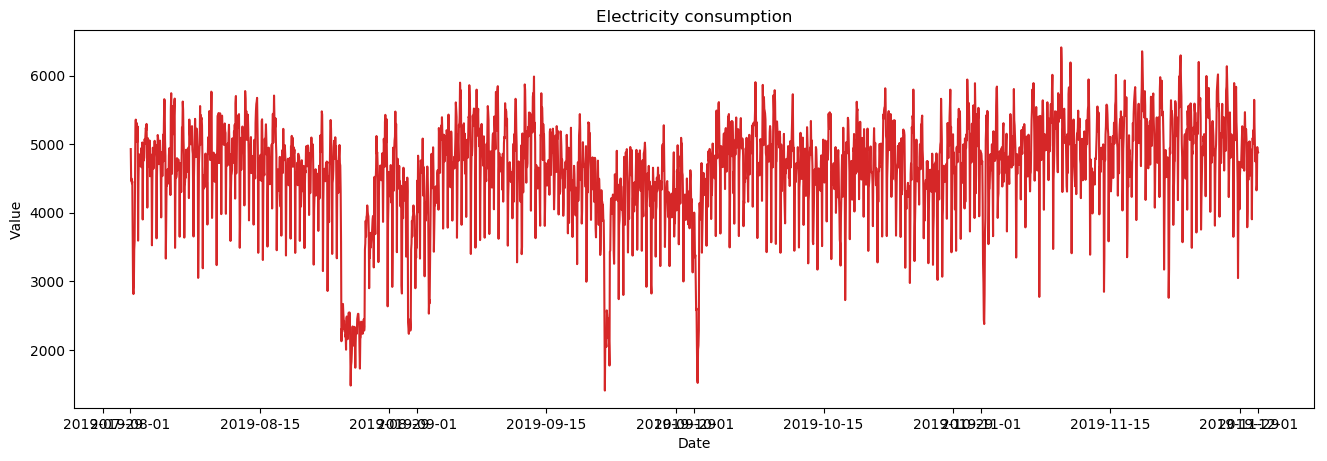

In [36]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100, all_x=False, labels=False):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    if all_x: plt.xticks(x)
    if labels:
        for lx,ly in zip(x,y):
            label = "{0:.0f}".format(ly)
            plt.annotate(label,(lx,ly),textcoords="offset points",xytext=(0,10),ha="center")
        
    plt.show()

plot_df(ser, x=ser.index, y=ser, title='Electricity consumption') 

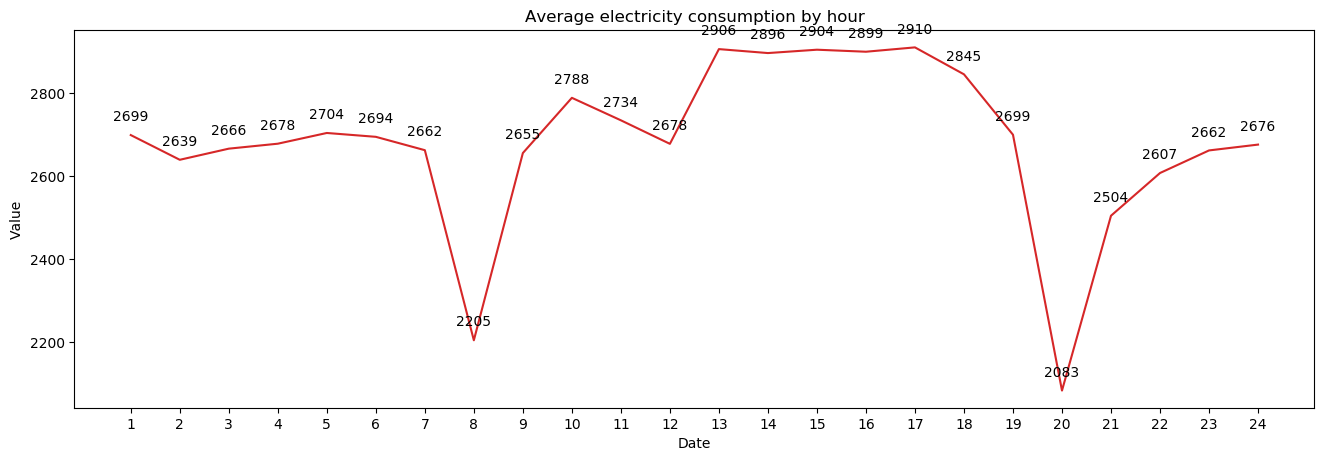

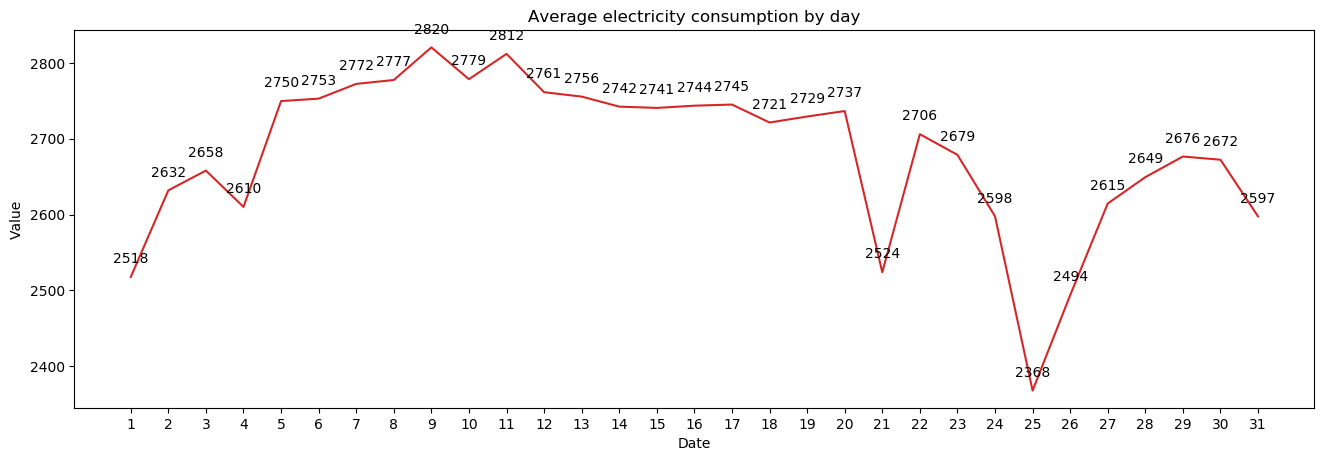

In [38]:
df_groupedByHour = df.groupby(["Hour"]).mean()
df_groupedByHour = df_groupedByHour["Volume"]
#df_groupedByHour.plot().suptitle('Average Consumption by hour', fontsize=22)
#print(df_groupedByHour)
plot_df(df_groupedByHour, x=df_groupedByHour.index, y=df_groupedByHour, title='Average electricity consumption by hour',all_x=True,labels=True)
df_groupedByDay = df.groupby(["Day"]).mean()
df_groupedByDay = df_groupedByDay["Volume"]
#df_groupedByHour.plot().suptitle('Average Consumption by hour', fontsize=22)
#print(df_groupedByHour)
plot_df(df_groupedByDay, x=df_groupedByDay.index, y=df_groupedByDay, title='Average electricity consumption by day',all_x=True,labels=True) 

In [59]:
df_GbMD = df.groupby(["Month","Day"]).mean()
df_GbMD=df_GbMD["Volume"]
xticks=df["Day"].unique()
months=df["Month"].unique()
colors=["b","g","r","c"]
print(df_GbMD.index)
print(df_GbMD)
df_GbMD.xs(8)

MultiIndex(levels=[[8, 9, 10, 11], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           labels=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]],
         

Day
1     2678.906250
2     2754.755000
3     2680.180357
4     2700.358393
5     2762.001250
6     2744.681071
7     2772.250060
8     2716.570298
9     2740.614167
10    2769.448750
11    2746.295774
12    2790.586012
13    2802.035655
14    2797.640536
15    2807.299702
16    2772.355595
17    2683.031667
18    2671.386667
19    2711.217560
20    2707.103690
21    2601.201429
22    2579.707619
23    2541.852857
24    2281.718571
25    1366.961726
26    1844.890238
27    2256.979702
28    2614.093631
29    2583.436012
30    2550.224881
31    2421.114881
Name: Volume, dtype: float64

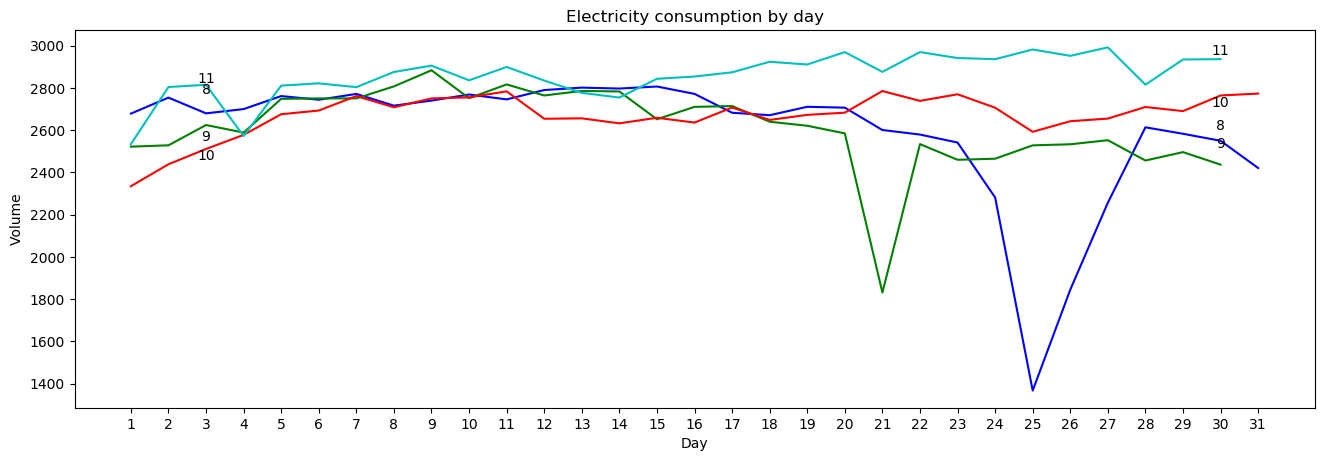

In [73]:
# Draw Plot
def plot_line(x, y, title,color):
    plt.plot(x, y, color)
    plt.annotate(title,(x[29],y[29]),textcoords="offset points",xytext=(0,3),ha="center")
    plt.annotate(title,(x[2],y[2]),textcoords="offset points",xytext=(0,3),ha="center")
plt.figure(figsize=(16,5), dpi=100)
plt.gca().set(title="Electricity consumption by day", xlabel="Day", ylabel="Volume")
plt.xticks(xticks)
n=0
for m in months:
    df_m=df_GbMD.xs(m)
    x=df_m.index
    y=df_m 
    plot_line(x,y,m,colors[n])
    n+=1    
plt.show()



Example

The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 15min frequency and we are looking for a weekly repetition of behavior.

$decompfreq = \cfrac{24h \cdot 60min}{15min} \cdot 7days$

In [14]:
 #Multiplicative Decomposition 
result_mul = seasonal_decompose(ser, model='multiplicative',freq=720)

# Additive Decomposition
result_add = seasonal_decompose(ser, model='additive', freq=720)

/home/denismoroz/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/home/denismoroz/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


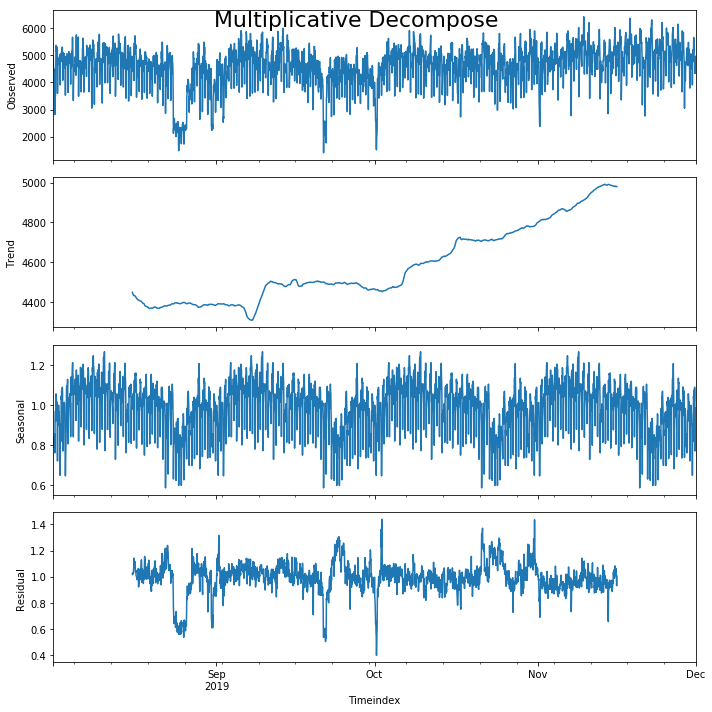

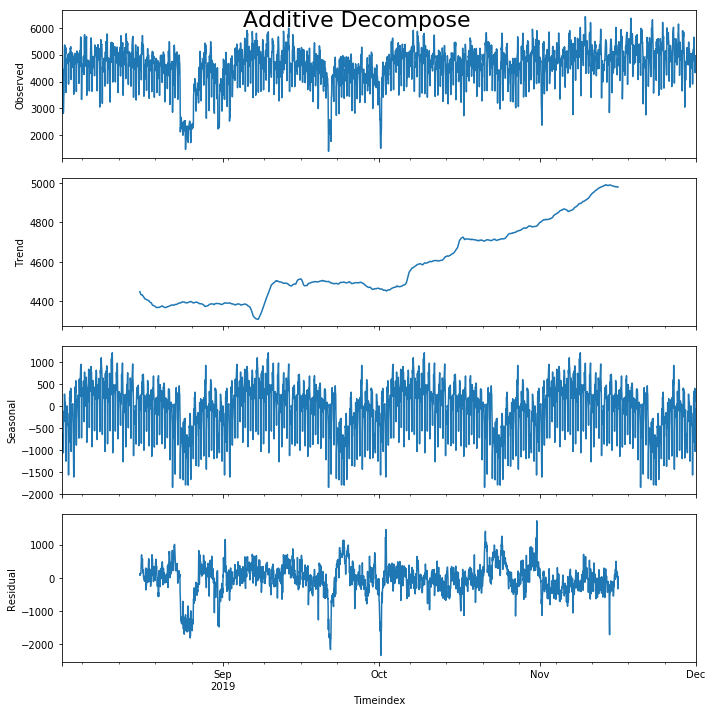

In [15]:
#Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

#### Test for stationarity

In [16]:
from statsmodels.tsa.stattools import adfuller, kpss

In [17]:
#ADF test
result=adfuller(ser,autolag="AIC")
print(f'ADF statistic:{result[0]}')
print(f'p-value:{result[1]}')
for key,value in result[4].items():
    print("Critical value:")
    print(f"  {key},{value}")
    

ADF statistic:-5.023307254089348
p-value:1.9952830945030155e-05
Critical value:
  1%,-3.4326069302485953
Critical value:
  5%,-2.8625371602624137
Critical value:
  10%,-2.567300816765755


As p-value is smaller than 0.05 than the series may be considered stationary.

In [18]:
# KPSS Test
result=kpss(ser,regression="c")
print(f'ADF statistic:{result[0]}')
print(f'p-value:{result[1]}')
for key,value in result[3].items():
    print("Critical value:")
    print(f"  {key},{value}")

ADF statistic:1.6054056661499962
p-value:0.01
Critical value:
  10%,0.347
Critical value:
  5%,0.463
Critical value:
  2.5%,0.574
Critical value:
  1%,0.739


/home/denismoroz/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


#### Detrending

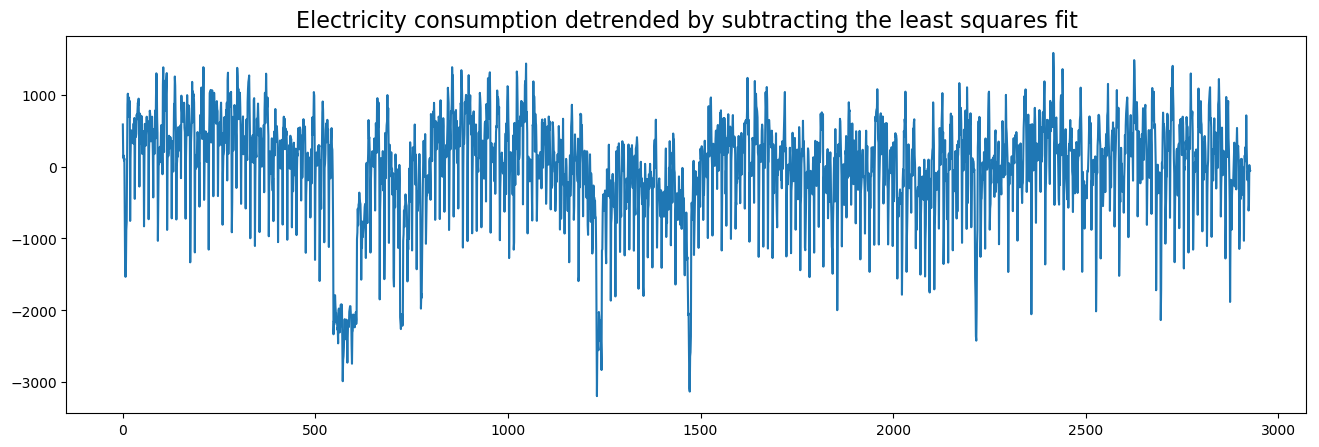

In [19]:
#Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(ser)
plt.figure(figsize=(16,5), dpi=100)
plt.plot(detrended)
plt.title('Electricity consumption detrended by subtracting the least squares fit', fontsize=16)
plt.show()

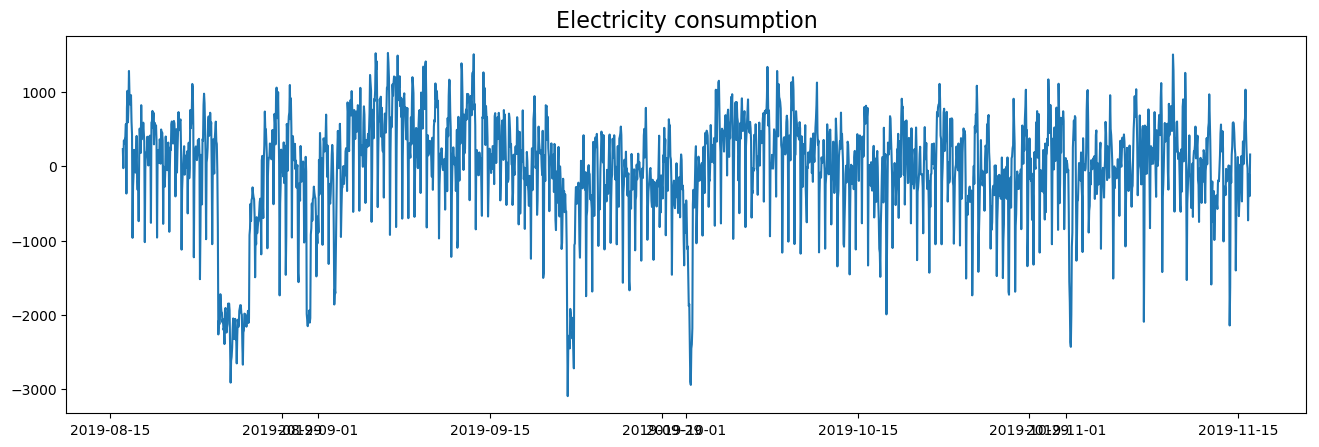

In [20]:
#Using statmodels: Subtracting the Trend Component.
plt.figure(figsize=(16,5), dpi=100)
detrended = ser - result_mul.trend
plt.plot(detrended)
plt.title('Electricity consumption', fontsize=16)
plt.show()

#### Autocorrelation 

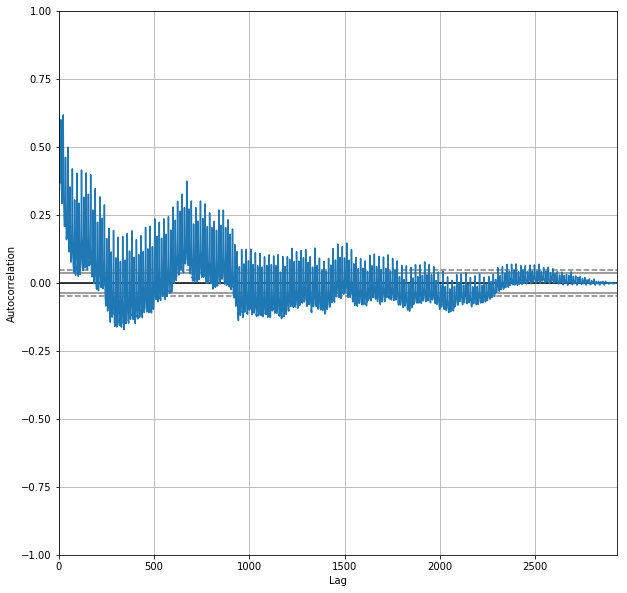

In [21]:
autocorrelation_plot(ser)
plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':120})
plt.show()

In [320]:
#average of last 24 items
np.average(ser[-24:])

4623.778333333333

In [319]:
ser[-24:]

Timeindex
2019-09-03 07:00:00    5437.08
2019-09-03 08:00:00    4870.14
2019-09-03 09:00:00    4368.82
2019-09-03 10:00:00    4696.30
2019-09-03 11:00:00    4491.76
2019-09-03 12:00:00    4611.34
2019-09-03 13:00:00    5464.44
2019-09-03 14:00:00    4661.36
2019-09-03 15:00:00    4657.64
2019-09-03 16:00:00    5266.02
2019-09-03 17:00:00    4645.88
2019-09-03 18:00:00    4159.81
2019-09-03 19:00:00    4665.13
2019-09-03 20:00:00    4556.00
2019-09-03 21:00:00    4122.61
2019-09-03 22:00:00    4208.88
2019-09-03 23:00:00    4381.22
2019-09-04 00:00:00    4906.15
2019-09-04 01:00:00    4912.39
2019-09-04 02:00:00    4344.14
2019-09-04 03:00:00    4454.46
2019-09-04 04:00:00    4278.86
2019-09-04 05:00:00    4616.80
2019-09-04 06:00:00    4193.45
Name: Volume, dtype: float64